In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

file = 'dataset/GSE146811_mmProstate10x_timecourse_rawCount.h5'

adata = sc.read_10x_h5(file)
adata

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1
reading dataset/GSE146811_mmProstate10x_timecourse_rawCount.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:01:16)


View of AnnData object with n_obs × n_vars = 87187 × 27998 
    var: 'gene_ids', 'feature_types', 'genome'

In [2]:
# read in the annotations as well
annot = pd.read_csv('dataset/GSE146811_mmProstate10x_full_sample_final.tsv.gz', compression='gzip', sep = '\t', index_col = 0)
annot

,barcode,barcodeInt,batchID,highLevelPred,highLevelPredAmbig,predType,predTypeAmbig,predTypeInt,predTypeIntAmbig
sampleID,,,,,,,,,
T00_Epi_1_id-AAACCTGCAAACCTAC,AAACCTGCAAACCTAC,24707441,T00_Epi_1,Epi,Epi,Epi_Basal_1,Epi_Basal_1,Epi_Basal,Epi_Basal
T00_Epi_1_id-AAACCTGCAATGGAGC,AAACCTGCAATGGAGC,24710793,T00_Epi_1,Epi,Epi,Epi_Basal_1,Epi_Basal_1,Epi_Basal,Epi_Basal
T00_Epi_1_id-AAACCTGCAGCTGGCT,AAACCTGCAGCTGGCT,24717223,T00_Epi_1,Epi,Epi,Epi_Basal_1,Epi_Basal_1,Epi_Basal,Epi_Basal
T00_Epi_1_id-AAACCTGCATGTCCTC,AAACCTGCATGTCCTC,24722269,T00_Epi_1,Epi,Epi,Epi_Basal_1,Epi_Basal_1,Epi_Basal,Epi_Basal
T00_Epi_1_id-AAACGGGAGCGGCTTC,AAACGGGAGCGGCTTC,27826813,T00_Epi_1,Str,Str,Str_Mesenchymal_1,Str_Mesenchymal_1,Str_Mesenchymal,Str_Mesenchymal
...,...,...,...,...,...,...,...,...,...
T10_Regen_Day28_2_id-TTTGTCAAGACGACGT,TTTGTCAAGACGACGT,4275078683,T10_Regen_Day28_2,Epi,Epi,Epi_Basal_1,Epi_Basal_1,Epi_Basal,Epi_Basal
T10_Regen_Day28_2_id-TTTGTCACAGACGCTC,TTTGTCACAGACGCTC,4275118493,T10_Regen_Day28_2,Str,Str,Str_Glial,Str_Glial,Str_Glial,Str_Glial
T10_Regen_Day28_2_id-TTTGTCAGTCTAGTGT,TTTGTCAGTCTAGTGT,4275231931,T10_Regen_Day28_2,Epi,Epi,Epi_Basal_1,Epi_Basal_1,Epi_Basal,Epi_Basal


In [3]:
# add the info to obs
adata.obs = annot
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 87187 × 27998 
    obs: 'barcode', 'barcodeInt', 'batchID', 'highLevelPred', 'highLevelPredAmbig', 'predType', 'predTypeAmbig', 'predTypeInt', 'predTypeIntAmbig'
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell
    finished (0:00:21)


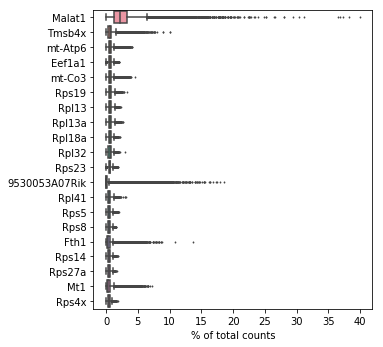

In [4]:
# continue with the standard analysis first
sc.settings.verbosity = 3
# plot higest expr genes
sc.pl.highest_expr_genes(adata, n_top = 20)

In [5]:
# get mitochondria QC stats
mito_genes = adata.var_names.str.startswith('mt-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis = 1) / np.sum(adata.X, axis = 1)
adata.obs['n_counts'] = adata.X.sum(axis = 1)

In [7]:
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_genes(adata, min_cells = 3)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


filtered out 6663 genes that are detected in less than 3 cells


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


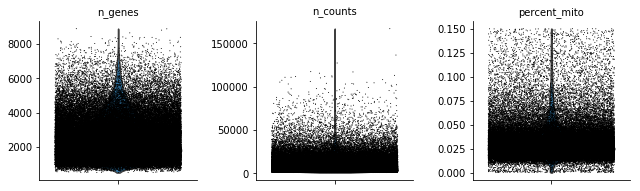

In [8]:
# violin plot of the computed quality measures.
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'], jitter = 0.4, multi_panel = True)

In [9]:
# normalize matrix X to 10000 reads per cell
sc.pp.normalize_total(adata)
# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
# Logarithmize the data
sc.pp.log1p(adata)
# Set the .raw attribute of AnnData object to the logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. 
adata.raw = adata

normalizing counts per cell
    finished (0:00:01)


extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


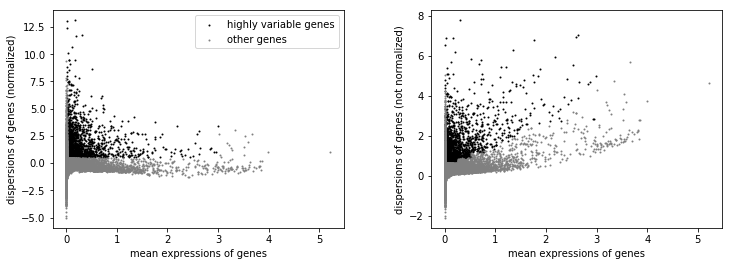

In [10]:
# Identify highly-variable genes.
sc.pp.highly_variable_genes(adata, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
# plot highly_variable_genes
sc.pl.highly_variable_genes(adata)

In [11]:
# Actually do the filtering.
adata = adata[:, adata.var['highly_variable']]

In [12]:
import multiprocessing
# regress and scale for PCA
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'], n_jobs = multiprocessing.cpu_count()-1)
sc.pp.scale(adata, max_value = 10)
sc.tl.pca(adata, svd_solver = 'arpack', n_comps = 50)

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:05:41)
computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:26)


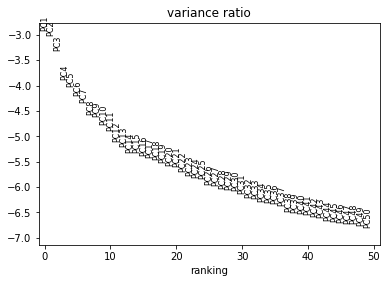

In [13]:
# Principal component analysis
sc.pl.pca_variance_ratio(adata, log = True, n_pcs = 50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:26)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:42)


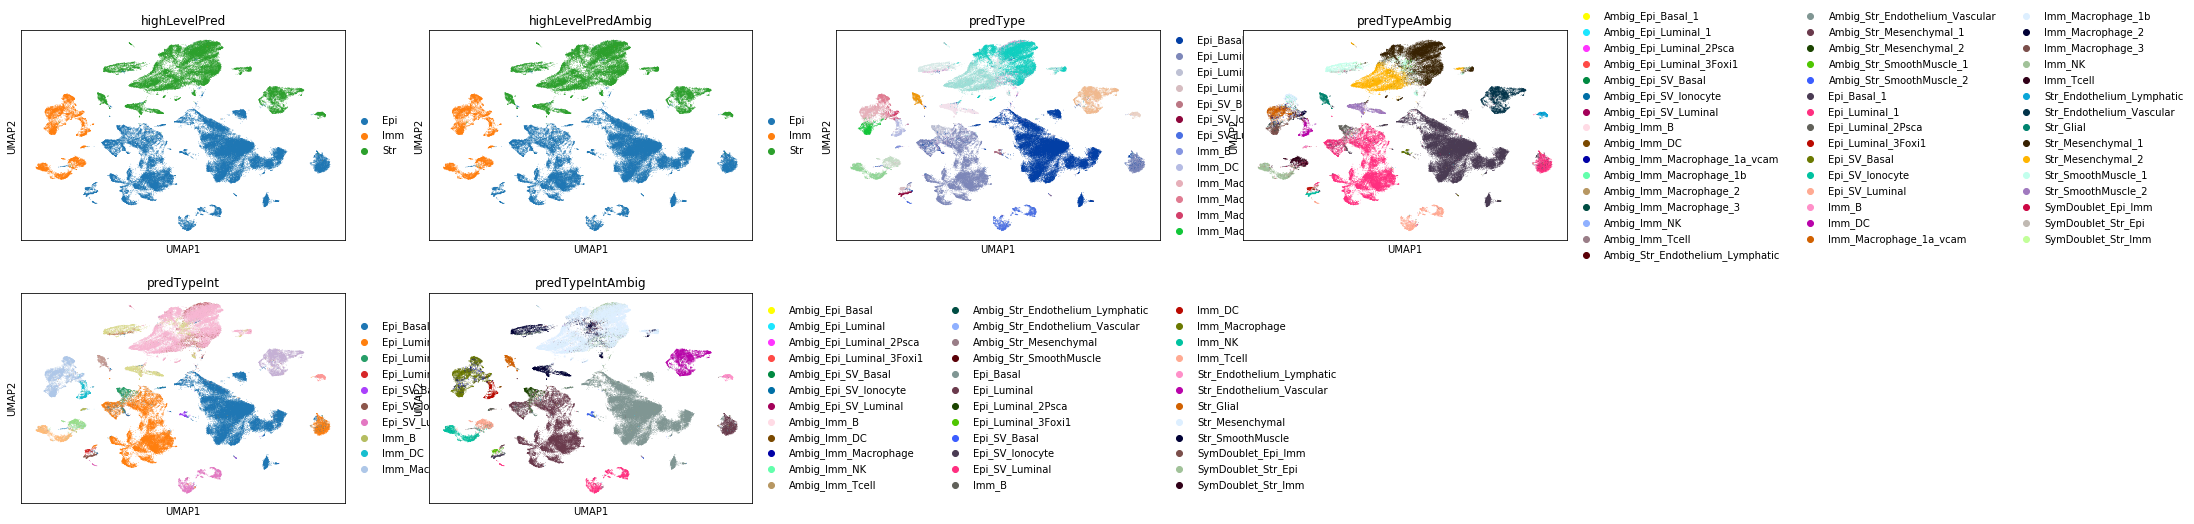

In [14]:
# Computing the neighborhood graph. Seurat uses k = 20 as default
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs = 50)
# run UMAP
sc.tl.umap(adata, n_components = 2, min_dist = 0.3)
# find clusters
# sc.tl.leiden(adata)
# plotting groups and clusters
sc.pl.umap(adata, color = ['highLevelPred', 'highLevelPredAmbig', 'predType', 'predTypeAmbig', 'predTypeInt', 'predTypeIntAmbig'])

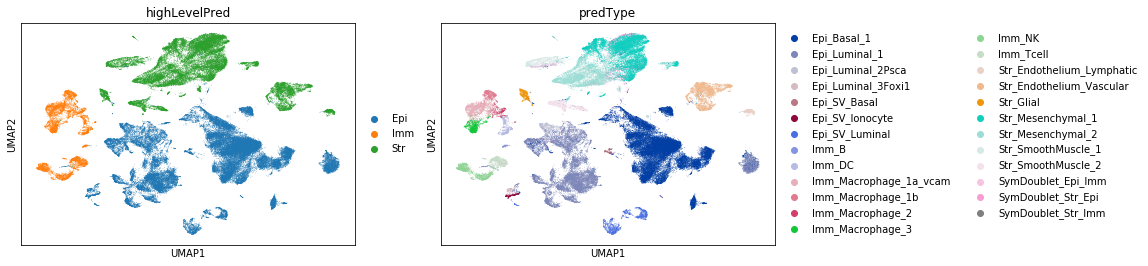

In [17]:
sc.pl.umap(adata, color = ['highLevelPred', 'predType'])

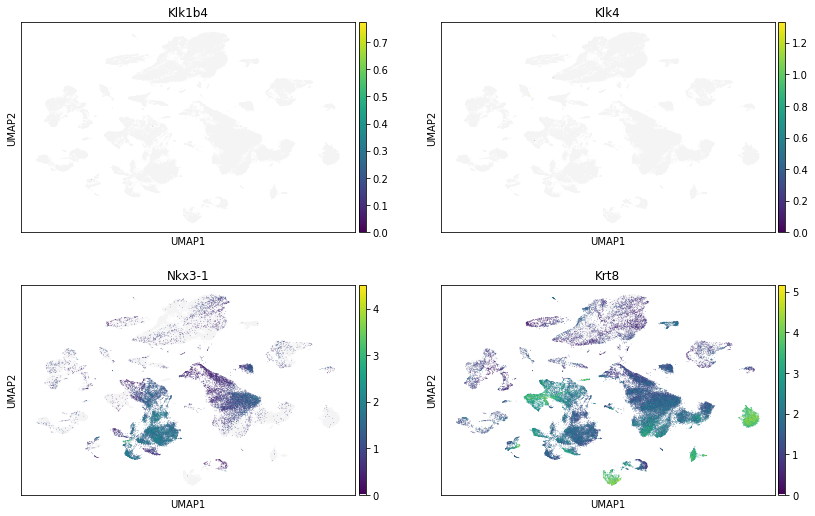

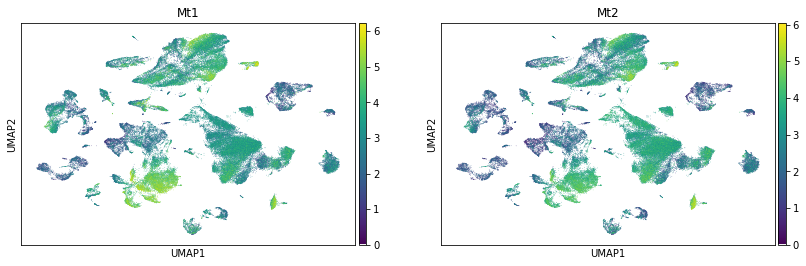

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([245/256, 245/256, 245/256, 1])
newcolors[:1, :] = grey
newcmp = ListedColormap(newcolors)
sc.pl.umap(adata, color = ['Klk1b4', 'Klk4', 'Nkx3-1', 'Krt8'], color_map = newcmp, ncols =2)

sc.pl.umap(adata, color = ['Mt1', 'Mt2'], color_map = newcmp)

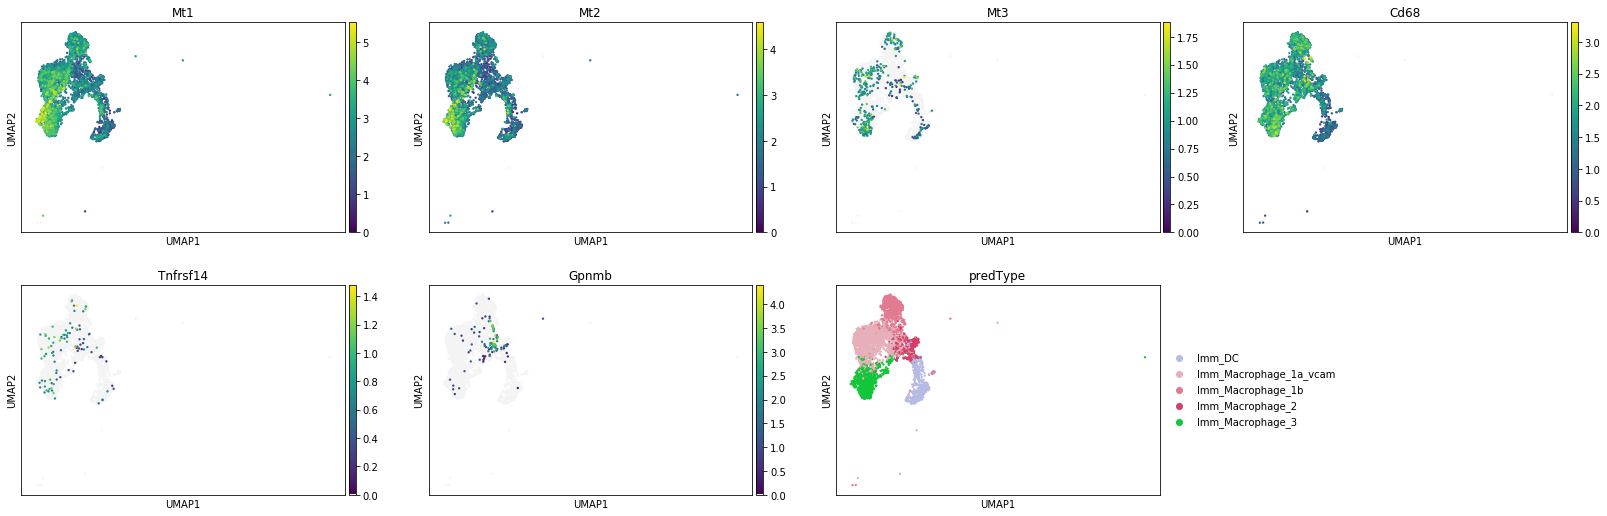

In [4]:
# subset to just the macrophages
mnp = adata[adata.obs['predType'].isin(['Imm_DC', 'Imm_Macrophage', 'Imm_Macrophage_1a_vcam', 'Imm_Macrophage_1b', 'Imm_Macrophage_2', 'Imm_Macrophage_3'])]
sc.pl.umap(mnp, color = ['Mt1', 'Mt2', 'Mt3', 'Cd68', 'Tnfrsf14', 'Gpnmb','predType'], color_map = newcmp)

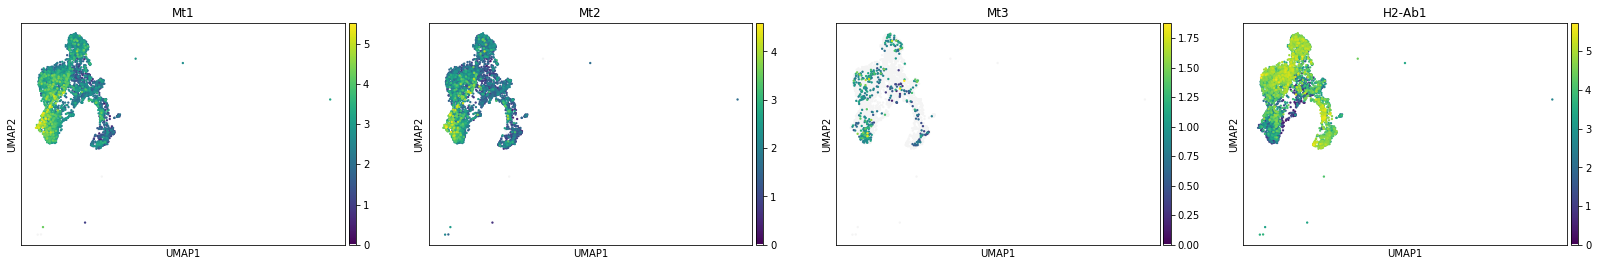

In [5]:
sc.pl.umap(mnp, color = ['Mt1', 'Mt2', 'Mt3', 'H2-Ab1'], color_map = newcmp)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_predType']`


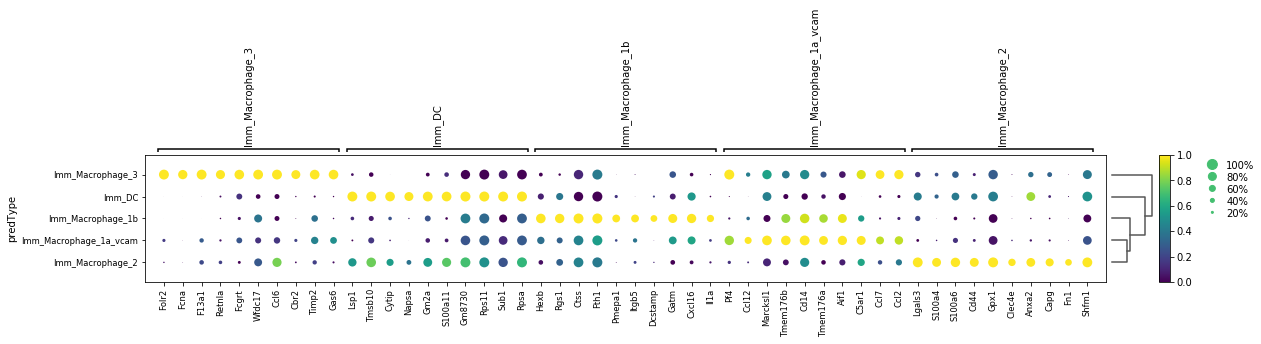

In [36]:
sc.tl.rank_genes_groups(mnp, groupby = 'predType', method = 'wilcoxon')
sc.pl.rank_genes_groups_dotplot(mnp,n_genes = 10, color_map = 'viridis', standard_scale = 'var')

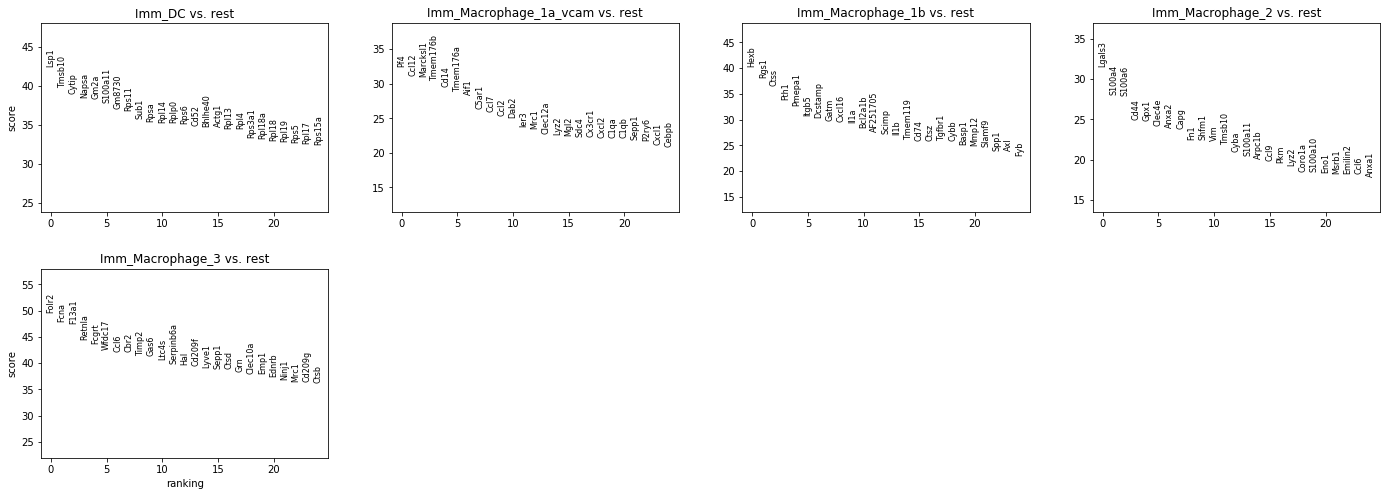

In [37]:
sc.pl.rank_genes_groups(mnp, n_genes = 25, sharey = False)

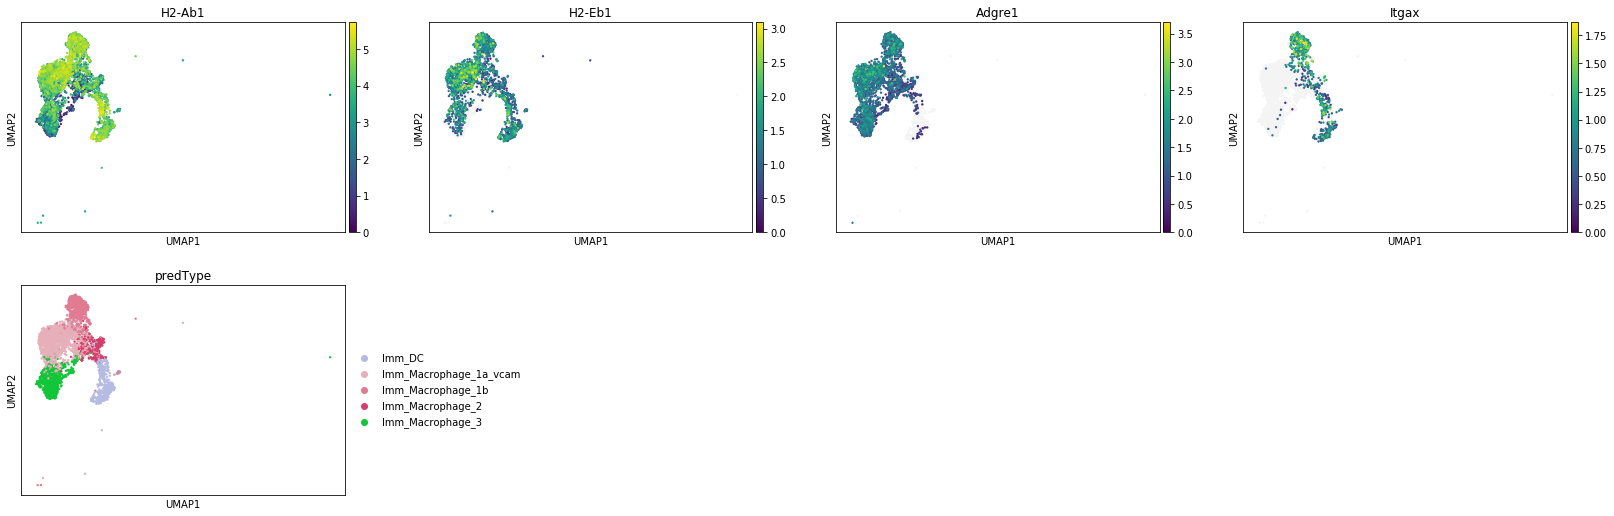

In [39]:
sc.pl.umap(mnp, color = ['H2-Ab1', 'H2-Eb1','Adgre1', 'Itgax', 'predType'], color_map = newcmp)

In [40]:
# anyway, save the big object and see what menna wants me to do
adata.write('dataset/Karthaus_mouse_prostate.h5ad', compression = 'gzip')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

adata = sc.read_h5ad('dataset/Karthaus_mouse_prostate.h5ad')
adata

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.5.post2 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.4.1 pandas==0.25.1 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


AnnData object with n_obs × n_vars = 87187 × 2186 
    obs: 'barcode', 'barcodeInt', 'batchID', 'highLevelPred', 'highLevelPredAmbig', 'predType', 'predTypeAmbig', 'predTypeInt', 'predTypeIntAmbig', 'percent_mito', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'highLevelPredAmbig_colors', 'highLevelPred_colors', 'neighbors', 'pca', 'predTypeAmbig_colors', 'predTypeIntAmbig_colors', 'predTypeInt_colors', 'predType_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

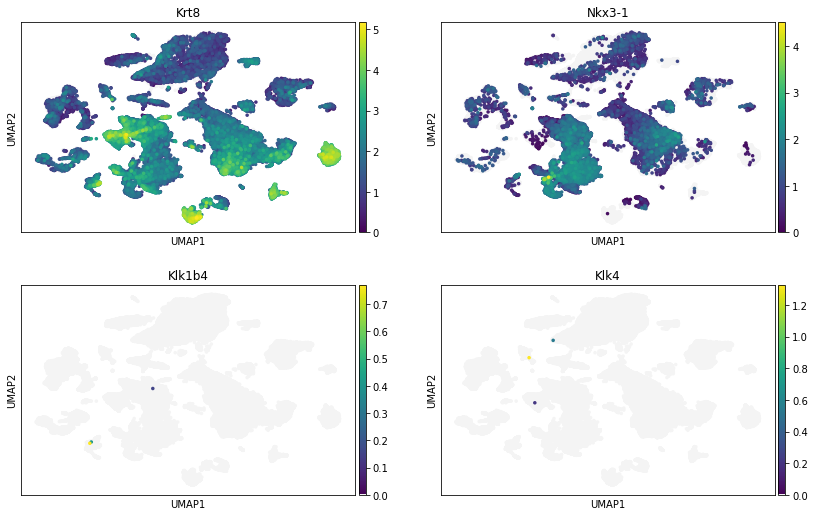

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([245/256, 245/256, 245/256, 1])
newcolors[:1, :] = grey
newcmp = ListedColormap(newcolors)
sc.pl.umap(adata, color = ['Krt8', 'Nkx3-1', 'Klk1b4', 'Klk4'], color_map = newcmp, size = 50, ncols =2)

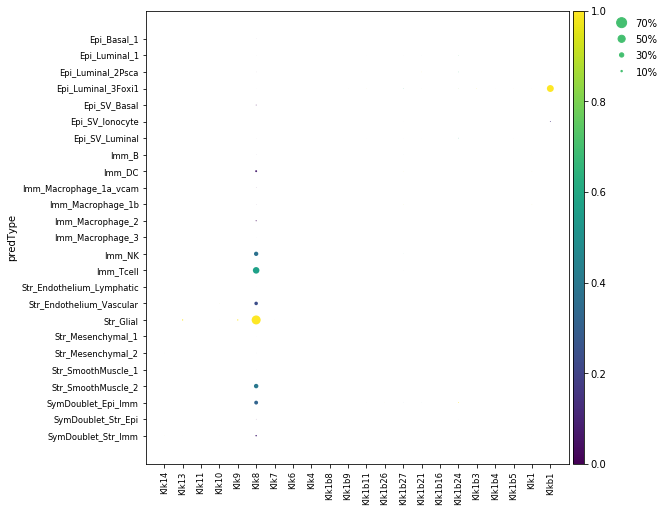

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[7.699999999999999, 0, 0.2, 0.5, 0.25])

In [6]:
klkgenes = list(adata.raw.var.index[adata.raw.var.index.str.contains('Klk')])
sc.pl.dotplot(adata, klkgenes, groupby = 'predType', color_map = 'viridis', standard_scale = 'var')

In [8]:
adata.raw.var.to_csv('dataset/Karthaus_mouse_prostate_var.csv')

In [ ]:
# ok so it seems like it's too difficult to make the expression files properly in R, so i'll subset here

In [9]:
mnp = adata[adata.obs['predType'].isin(['Imm_DC', 'Imm_Macrophage', 'Imm_Macrophage_1a_vcam', 'Imm_Macrophage_1b', 'Imm_Macrophage_2', 'Imm_Macrophage_3'])]
L1 = adata[adata.obs['predType'] == 'Epi_Luminal_1']
L2 = adata[adata.obs['predType'] == 'Epi_Luminal_2Psca']
L3 = adata[adata.obs['predType'] == 'Epi_Luminal_3Foxi1']

In [10]:
mnp.write('dataset/Karthaus_mouse_prostate_mnp.h5ad', compression = 'gzip')
L1.write('dataset/Karthaus_mouse_prostate_l1.h5ad', compression = 'gzip')
L2.write('dataset/Karthaus_mouse_prostate_l2.h5ad', compression = 'gzip')
L3.write('dataset/Karthaus_mouse_prostate_l3.h5ad', compression = 'gzip')

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

adata = sc.read_h5ad('dataset/Karthaus_mouse_prostate.h5ad')
adata

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.5.post1 anndata==0.6.22.post1 umap==0.4.6 numpy==1.19.1 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1


AnnData object with n_obs × n_vars = 87187 × 2186 
    obs: 'barcode', 'barcodeInt', 'batchID', 'highLevelPred', 'highLevelPredAmbig', 'predType', 'predTypeAmbig', 'predTypeInt', 'predTypeIntAmbig', 'percent_mito', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'highLevelPredAmbig_colors', 'highLevelPred_colors', 'neighbors', 'pca', 'predTypeAmbig_colors', 'predTypeIntAmbig_colors', 'predTypeInt_colors', 'predType_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([245/256, 245/256, 245/256, 1])
newcolors[:1, :] = grey
newcmp = ListedColormap(newcolors)

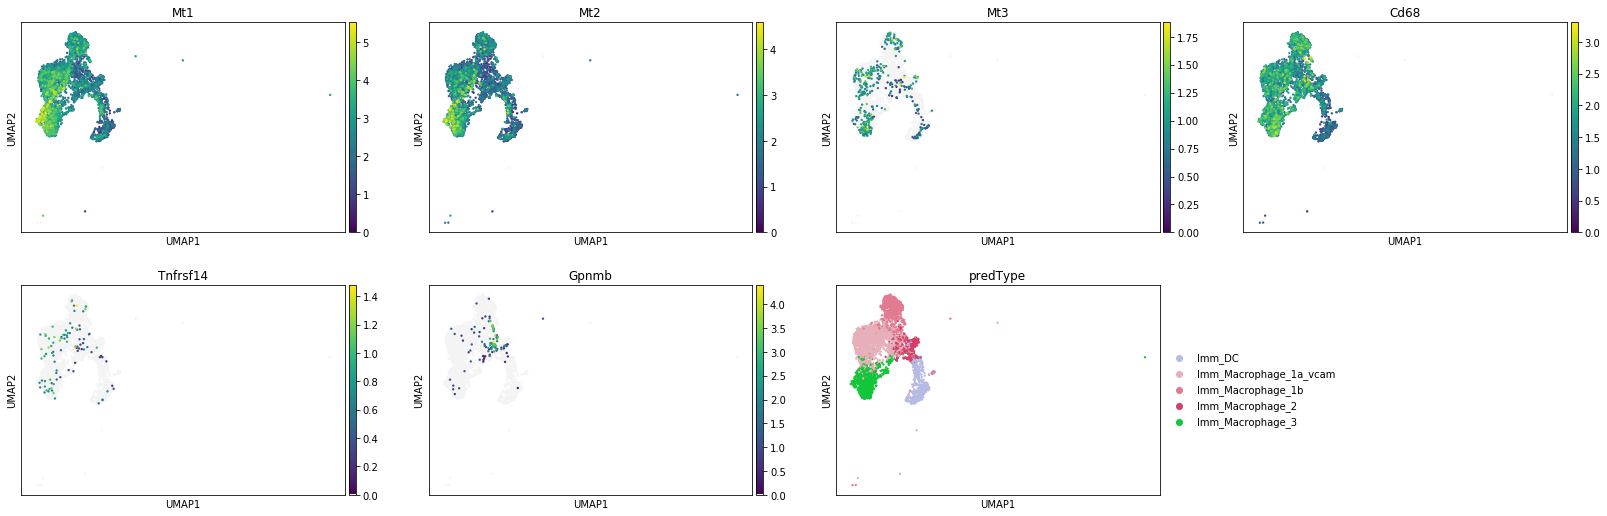

In [4]:
# subset to just the macrophages
mnp = adata[adata.obs['predType'].isin(['Imm_DC', 'Imm_Macrophage', 'Imm_Macrophage_1a_vcam', 'Imm_Macrophage_1b', 'Imm_Macrophage_2', 'Imm_Macrophage_3'])]
sc.pl.umap(mnp, color = ['Mt1', 'Mt2', 'Mt3', 'Cd68', 'Tnfrsf14', 'Gpnmb','predType'], color_map = newcmp)

In [5]:
import re
# re.findall('Slc3[09]a', list(mnp.raw.var.index))
r = re.compile('Slc3[09]a')
newlist = list(filter(r.match, list(mnp.raw.var.index))) # Read Note
print(newlist)

['Slc39a10', 'Slc30a10', 'Slc30a1', 'Slc39a12', 'Slc39a13', 'Slc30a4', 'Slc39a1', 'Slc30a7', 'Slc39a8', 'Slc30a2', 'Slc30a3', 'Slc30a9', 'Slc39a3', 'Slc39a5', 'Slc39a2', 'Slc39a14', 'Slc39a11', 'Slc30a5', 'Slc39a9', 'Slc39a4', 'Slc39a7', 'Slc30a6', 'Slc39a6']


In [6]:
import re
# re.findall('Slc3[09]a', list(mnp.raw.var.index))
r = re.compile('^Mt[0-9]')
newlist = list(filter(r.match, list(mnp.raw.var.index))) # Read Note
print(newlist)

['Mt4', 'Mt3', 'Mt2', 'Mt1']


In [7]:
# list(mnp.raw.var.index)

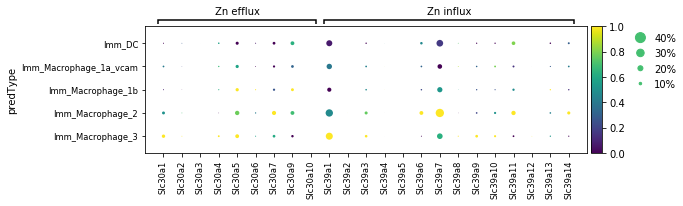

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[8.049999999999999, 0, 0.2, 0.5, 0.25])

In [8]:
Zn_transport = {'Zn efflux':['Slc30a1', 'Slc30a2', 'Slc30a3', 'Slc30a4', 'Slc30a5', 'Slc30a6', 'Slc30a7', 'Slc30a9', 'Slc30a10'], 'Zn influx':['Slc39a1', 'Slc39a2', 'Slc39a3', 'Slc39a4', 'Slc39a5', 'Slc39a6', 'Slc39a7', 'Slc39a8', 'Slc39a9', 'Slc39a10', 'Slc39a11', 'Slc39a12', 'Slc39a13', 'Slc39a14']}
sc.pl.dotplot(mnp, Zn_transport, groupby = 'predType', standard_scale ='var', var_group_rotation = 0, color_map = 'viridis', save = '/mouse_zinc_genes.pdf')

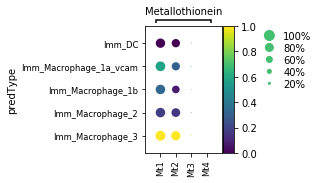

GridSpec(2, 5, height_ratios=[0.5, 10], width_ratios=[1.4, 0, 0.2, 0.5, 0.25])

In [9]:
sc.pl.dotplot(mnp, {'Metallothionein':['Mt1', 'Mt2', 'Mt3', 'Mt4']}, groupby = 'predType', standard_scale ='var', var_group_rotation = 0, color_map = 'viridis', save = '/mouse_metallothioneins.pdf')

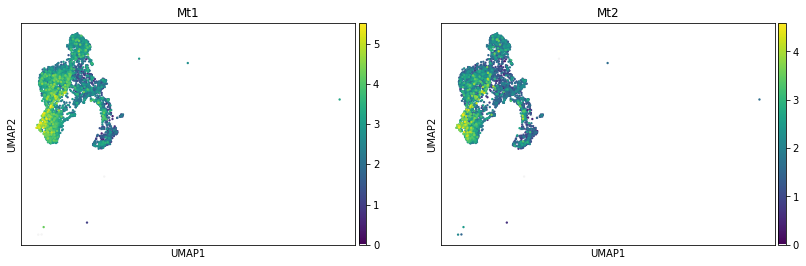

In [27]:
sc.pl.umap(mnp, color = ['Mt1', 'Mt2'], color_map = newcmp)

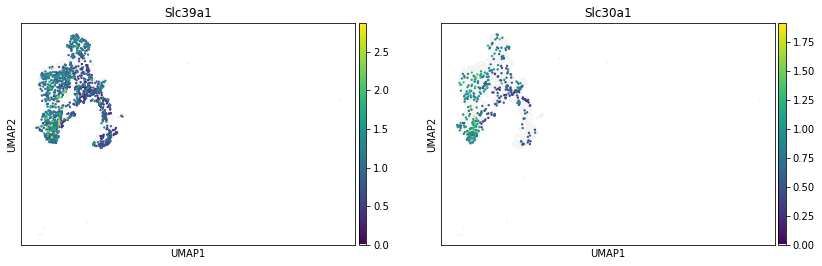

In [26]:
sc.pl.umap(mnp, color = ['Slc39a1', 'Slc30a1'], color_map = newcmp)

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/home/jovyan/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_versions()

adata = sc.read_h5ad('dataset/Karthaus_mouse_prostate.h5ad')
adata

/home/jovyan/my-conda-envs/mypython3/lib/python3.7/site-packages/anndata/core/anndata.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


scanpy==1.4.5.post1 anndata==0.6.22.post1 umap==0.4.6 numpy==1.19.1 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.6.1


AnnData object with n_obs × n_vars = 87187 × 2186 
    obs: 'barcode', 'barcodeInt', 'batchID', 'highLevelPred', 'highLevelPredAmbig', 'predType', 'predTypeAmbig', 'predTypeInt', 'predTypeIntAmbig', 'percent_mito', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'highLevelPredAmbig_colors', 'highLevelPred_colors', 'neighbors', 'pca', 'predTypeAmbig_colors', 'predTypeIntAmbig_colors', 'predTypeInt_colors', 'predType_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = np.array([245/256, 245/256, 245/256, 1])
newcolors[:1, :] = grey
newcmp = ListedColormap(newcolors)

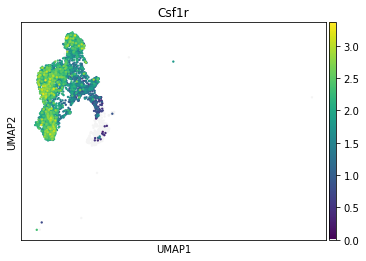

In [5]:
mnp = adata[adata.obs['predType'].isin(['Imm_DC', 'Imm_Macrophage', 'Imm_Macrophage_1a_vcam', 'Imm_Macrophage_1b', 'Imm_Macrophage_2', 'Imm_Macrophage_3'])]
sc.pl.umap(mnp, color = ['Csf1r'], color_map = newcmp)

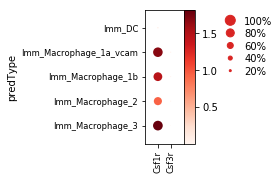

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [8]:
sc.pl.dotplot(mnp, ['Csf1r', 'Csf3r'], groupby = 'predType')